## Project: What we can learn from visitors visiting Taiwan from 2011 to 2023

The original dataset is available from [Taiwan Tourism Bureau](https://stat.taiwan.net.tw/)

### Introduction:
The data was downloaded from Taiwan Tourism Bureau. It contains the monthly number of visitors to Taiwan by their gender, residence and purpose.

### Background:
Taiwan's travel and tourism industry plays a significant role in its economy, contributing to economic growth, job creation, and cultural exchange. The foreign exchange earnings from tourism for the year 2019 were estimated to be 14.41 billion US dollars, which was 4.43% of Taiwan's GDP. The total number of visitors to Taiwan in 2019 also reached an all-time-high record, 11.85 million.

The goal is to determine whether visitors to Taiwan are increasing, declining or being stagnant and to build a time series model that forecasts the future from the perspective of the past.

**In this notebook, we will focus on Data Wrangling & Exploratary Data Analysis (EDA).**

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
taiwan_raw =  pd.read_csv("../Raw_Data/2023_Visitors_by_Residence_Purpose.csv")
print(taiwan_raw.shape)
taiwan_raw.head()

(29454, 20)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,業務,Unnamed: 4,觀光,Unnamed: 6,探親,Unnamed: 8,會議,Unnamed: 10,求學,Unnamed: 12,展覽,Unnamed: 14,醫療,Unnamed: 16,其他,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,Business,NaN,Leisure,NaN,Visit Relatives,NaN,Conference,NaN,Study,NaN,Exhibition,NaN,Medical Treatment,NaN,Others,NaN,NaN
1,年別,月份,居住地,男,女,男,女,男,女,男,女,男,女,男,女,男,女,男,女,小計
2,Years,Months,Residence,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Total
3,100,1,亞洲地區(Asia),46453,9090,92413,107501,9770,20976,2568,1019,682,574,0,0,0,0,10195,13477,314718
4,100,1,日本(Japan),22827,1004,33170,35470,1933,2276,503,40,112,94,0,0,0,0,851,522,98802


In [3]:
# Call the info method on taiwan_raw to see a summary of the data
taiwan_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29454 entries, 0 to 29453
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   29453 non-null  object
 1   Unnamed: 1   29452 non-null  object
 2   Unnamed: 2   29452 non-null  object
 3   業務           29454 non-null  object
 4   Unnamed: 4   29453 non-null  object
 5   觀光           29454 non-null  object
 6   Unnamed: 6   29453 non-null  object
 7   探親           29454 non-null  object
 8   Unnamed: 8   29453 non-null  object
 9   會議           29454 non-null  object
 10  Unnamed: 10  29453 non-null  object
 11  求學           29454 non-null  object
 12  Unnamed: 12  29453 non-null  object
 13  展覽           29454 non-null  object
 14  Unnamed: 14  29453 non-null  object
 15  醫療           29454 non-null  object
 16  Unnamed: 16  29453 non-null  object
 17  其他           29454 non-null  object
 18  Unnamed: 18  29453 non-null  object
 19  Unnamed: 19  29453 non-nu

Upon initial inspection of the data, we can see that it is not in a favorable format.

In [4]:
# Save the eight purposes into a list
purpose = taiwan_raw.iloc[0].dropna().to_list()
purpose

['Business',
 'Leisure',
 'Visit Relatives',
 'Conference',
 'Study',
 'Exhibition',
 'Medical Treatment',
 'Others']

In [5]:
# Reassign column names by using the first row and reset index
taiwan_raw.columns = taiwan_raw.iloc[2]
taiwan_raw = taiwan_raw.drop([0,1,2,29453]).reset_index(drop=True)
taiwan_raw


2,Years,Months,Residence,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Total
0,100,1,亞洲地區(Asia),46453,9090,92413,107501,9770,20976,2568,1019,682,574,0,0,0,0,10195,13477,314718
1,100,1,日本(Japan),22827,1004,33170,35470,1933,2276,503,40,112,94,0,0,0,0,851,522,98802
2,100,1,韓國(Korea),4762,518,6328,7108,995,1311,228,47,196,115,0,0,0,0,793,483,22884
3,100,1,北韓(DPRK),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100,1,香港(Hong Kong),4472,1406,10703,14248,1242,1013,375,218,47,53,0,0,0,0,2340,2692,38809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29445,112,11,羅馬尼亞(Romania),24,4,70,52,9,5,1,0,1,1,10,2,0,0,42,20,241
29446,112,11,保加利亞(Bulgaria),15,7,26,9,0,2,1,0,0,1,0,0,0,0,38,27,126
29447,112,11,摩爾多瓦(Moldova),0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2
29448,112,11,聖馬利諾(San Marino),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [6]:
# Drop rows containing the region summary
taiwan_raw = taiwan_raw[~taiwan_raw['Residence'].str.contains('地區')]
taiwan_raw

2,Years,Months,Residence,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Total
1,100,1,日本(Japan),22827,1004,33170,35470,1933,2276,503,40,112,94,0,0,0,0,851,522,98802
2,100,1,韓國(Korea),4762,518,6328,7108,995,1311,228,47,196,115,0,0,0,0,793,483,22884
3,100,1,北韓(DPRK),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100,1,香港(Hong Kong),4472,1406,10703,14248,1242,1013,375,218,47,53,0,0,0,0,2340,2692,38809
5,100,1,中國大陸(China),4598,1956,31560,37824,1805,11020,902,420,90,76,0,0,0,0,3022,3443,96716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29445,112,11,羅馬尼亞(Romania),24,4,70,52,9,5,1,0,1,1,10,2,0,0,42,20,241
29446,112,11,保加利亞(Bulgaria),15,7,26,9,0,2,1,0,0,1,0,0,0,0,38,27,126
29447,112,11,摩爾多瓦(Moldova),0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2
29448,112,11,聖馬利諾(San Marino),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
# Reshape a DataFrame by unpivoting the gender information in each purpose categories
taiwan_raw_business = pd.melt(taiwan_raw.iloc[:,[0,1,2,3,4]], id_vars=['Years', 'Months', 'Residence'], var_name='Gender', value_name=purpose[0])
taiwan_raw_leisure = pd.melt(taiwan_raw.iloc[:,[0,1,2,5,6]], id_vars=['Years', 'Months', 'Residence'], var_name='Gender', value_name=purpose[1])
taiwan_raw_visit_relatives = pd.melt(taiwan_raw.iloc[:,[0,1,2,7,8]], id_vars=['Years', 'Months', 'Residence'], var_name='Gender', value_name=purpose[2])
taiwan_raw_conference = pd.melt(taiwan_raw.iloc[:,[0,1,2,9,10]], id_vars=['Years', 'Months', 'Residence'], var_name='Gender', value_name=purpose[3])
taiwan_raw_study = pd.melt(taiwan_raw.iloc[:,[0,1,2,11,12]], id_vars=['Years', 'Months', 'Residence'], var_name='Gender', value_name=purpose[4])
taiwan_raw_exhibition = pd.melt(taiwan_raw.iloc[:,[0,1,2,13,14]], id_vars=['Years', 'Months', 'Residence'], var_name='Gender', value_name=purpose[5])
taiwan_raw_medical_treatment = pd.melt(taiwan_raw.iloc[:,[0,1,2,15,16]], id_vars=['Years', 'Months', 'Residence'], var_name='Gender', value_name=purpose[6])
taiwan_raw_others = pd.melt(taiwan_raw.iloc[:,[0,1,2,17,18]], id_vars=['Years', 'Months', 'Residence'], var_name='Gender', value_name=purpose[7])
taiwan_raw_business

,Years,Months,Residence,Gender,Business
0,100,1,日本(Japan),Male,22827
1,100,1,韓國(Korea),Male,4762
2,100,1,北韓(DPRK),Male,0
3,100,1,香港(Hong Kong),Male,4472
4,100,1,中國大陸(China),Male,4598
...,...,...,...,...,...
57345,112,11,羅馬尼亞(Romania),Female,4
57346,112,11,保加利亞(Bulgaria),Female,7
57347,112,11,摩爾多瓦(Moldova),Female,0
57348,112,11,聖馬利諾(San Marino),Female,0


In [8]:
# Combine all the melted dataframes
taiwan_final = pd.concat([taiwan_raw_business, 
                          taiwan_raw_leisure.iloc[:,4:5], 
                          taiwan_raw_visit_relatives.iloc[:,4:5], 
                          taiwan_raw_conference.iloc[:,4:5], 
                          taiwan_raw_study.iloc[:,4:5], 
                          taiwan_raw_exhibition.iloc[:,4:5], 
                          taiwan_raw_medical_treatment.iloc[:,4:5], 
                          taiwan_raw_others.iloc[:,4:5]], axis=1)
taiwan_final

,Years,Months,Residence,Gender,Business,Leisure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others
0,100,1,日本(Japan),Male,22827,33170,1933,503,112,0,0,851
1,100,1,韓國(Korea),Male,4762,6328,995,228,196,0,0,793
2,100,1,北韓(DPRK),Male,0,0,0,0,0,0,0,0
3,100,1,香港(Hong Kong),Male,4472,10703,1242,375,47,0,0,2340
4,100,1,中國大陸(China),Male,4598,31560,1805,902,90,0,0,3022
...,...,...,...,...,...,...,...,...,...,...,...,...
57345,112,11,羅馬尼亞(Romania),Female,4,52,5,0,1,2,0,20
57346,112,11,保加利亞(Bulgaria),Female,7,9,2,0,1,0,0,27
57347,112,11,摩爾多瓦(Moldova),Female,0,0,0,0,0,0,0,0
57348,112,11,聖馬利諾(San Marino),Female,0,0,0,0,0,0,0,0


In [9]:
# Call the info method on taiwan_final to see a summary of the data
taiwan_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57350 entries, 0 to 57349
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Years              57350 non-null  object
 1   Months             57350 non-null  object
 2   Residence          57350 non-null  object
 3   Gender             57350 non-null  object
 4   Business           57350 non-null  object
 5   Leisure            57350 non-null  object
 6   Visit Relatives    57350 non-null  object
 7   Conference         57350 non-null  object
 8   Study              57350 non-null  object
 9   Exhibition         57350 non-null  object
 10  Medical Treatment  57350 non-null  object
 11  Others             57350 non-null  object
dtypes: object(12)
memory usage: 5.3+ MB


In [10]:
# Extract strings within parentheses in the Residence column using regular expression
taiwan_final['Residence'] = taiwan_final['Residence'].str.extract(r'\(([^)]+)\)')
taiwan_final

,Years,Months,Residence,Gender,Business,Leisure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others
0,100,1,Japan,Male,22827,33170,1933,503,112,0,0,851
1,100,1,Korea,Male,4762,6328,995,228,196,0,0,793
2,100,1,DPRK,Male,0,0,0,0,0,0,0,0
3,100,1,Hong Kong,Male,4472,10703,1242,375,47,0,0,2340
4,100,1,China,Male,4598,31560,1805,902,90,0,0,3022
...,...,...,...,...,...,...,...,...,...,...,...,...
57345,112,11,Romania,Female,4,52,5,0,1,2,0,20
57346,112,11,Bulgaria,Female,7,9,2,0,1,0,0,27
57347,112,11,Moldova,Female,0,0,0,0,0,0,0,0
57348,112,11,San Marino,Female,0,0,0,0,0,0,0,0


In [11]:
# What are the countries and how many of them in the 'Residence' column
print(taiwan_final['Residence'].unique())
print(len(taiwan_final['Residence'].unique()))

['Japan' 'Korea' 'DPRK' 'Hong Kong' 'China' 'Macao' 'Mongolia' 'Vietnam'
 'Thailand' 'Malaysia' 'Singapore' 'Philippines' 'Brunei' 'Indonesia'
 'Cambodia' 'Laos' 'Timor' 'Myanmar' 'Solomon Islands' 'Tuvalu' 'India'
 'Pakistan' 'Sri Lanka' 'Bangladesh' 'Nepal' 'Bhutan ' 'Maldives'
 'Seychelles' 'Kiribati' 'Iran' 'Iraq' 'Bahrain' 'South Yemen'
 'Saudi Arabia' 'Kuwait' 'Qatar' 'Oman' 'Israel' 'Jordan' 'Syria'
 'Lebanon' 'UAE' 'Yemen' 'Turkey' 'Cyprus' 'Afghanistan' 'Egypt' 'Morocco'
 'Algeria' 'Tunisia' 'Libya\n' 'Sudan' 'Somalia' 'S. Africa'
 "Cote D'ivoire" 'Nigeria' 'Liberia' 'Guinea' 'Angola' 'Congo'
 'Central African' 'Botswana' 'Cameroon' 'Chad' 'Ethiopia' 'Gabon'
 'Gambia' 'Ghana' 'Kenya' 'Lesotho' 'Madagascar' 'Mauritius' 'Mali'
 'Malawi' 'Mozambique' 'Niger' 'Rwanda' 'Senegal' 'Sierra Leone'
 'Tanzania' 'Uganda' 'Zambia' 'Togolese Republic' 'Zimbabwe' 'Swaziland'
 'Burkina Faso' 'Benin' 'Equatorial Guinea' 'Cape Verde' 'Djibouti'
 'Saharaui' 'Guinea Bissau' 'Comoros' 'Reunion' 'S

This data contains a total of 184 countries, along with an additional category labeled as `'Unknow.'`

In [12]:
# Convert string numbers to numeric values and change their dtypes
taiwan_final = taiwan_final.apply(pd.to_numeric, errors='ignore').astype(int, errors='ignore')
taiwan_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57350 entries, 0 to 57349
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Years              57350 non-null  int64 
 1   Months             57350 non-null  int64 
 2   Residence          57350 non-null  object
 3   Gender             57350 non-null  object
 4   Business           57350 non-null  int64 
 5   Leisure            57350 non-null  int64 
 6   Visit Relatives    57350 non-null  int64 
 7   Conference         57350 non-null  int64 
 8   Study              57350 non-null  int64 
 9   Exhibition         57350 non-null  int64 
 10  Medical Treatment  57350 non-null  int64 
 11  Others             57350 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 5.3+ MB


In [13]:
# Change the year format 
taiwan_final['Years'] = taiwan_final['Years']+1911

# Combine the Years and Months columns into one Period column, covert it to DateTime, and move it after the Months column
taiwan_final['Period'] = taiwan_final['Years'].astype(str) + '-' + taiwan_final['Months'].astype(str)
taiwan_final['Period'] = pd.to_datetime(taiwan_final['Period'], format='%Y-%m')
taiwan_final.insert(2, 'Period', taiwan_final.pop('Period'))
taiwan_final

,Years,Months,Period,Residence,Gender,Business,Leisure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others
0,2011,1,2011-01-01,Japan,Male,22827,33170,1933,503,112,0,0,851
1,2011,1,2011-01-01,Korea,Male,4762,6328,995,228,196,0,0,793
2,2011,1,2011-01-01,DPRK,Male,0,0,0,0,0,0,0,0
3,2011,1,2011-01-01,Hong Kong,Male,4472,10703,1242,375,47,0,0,2340
4,2011,1,2011-01-01,China,Male,4598,31560,1805,902,90,0,0,3022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57345,2023,11,2023-11-01,Romania,Female,4,52,5,0,1,2,0,20
57346,2023,11,2023-11-01,Bulgaria,Female,7,9,2,0,1,0,0,27
57347,2023,11,2023-11-01,Moldova,Female,0,0,0,0,0,0,0,0
57348,2023,11,2023-11-01,San Marino,Female,0,0,0,0,0,0,0,0


In [14]:
# Add a column of 'Total' visitors
taiwan_final['Total'] = taiwan_final.loc[:, 'Business':'Others'].sum(axis=1)
taiwan_final

,Years,Months,Period,Residence,Gender,Business,Leisure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Total
0,2011,1,2011-01-01,Japan,Male,22827,33170,1933,503,112,0,0,851,59396
1,2011,1,2011-01-01,Korea,Male,4762,6328,995,228,196,0,0,793,13302
2,2011,1,2011-01-01,DPRK,Male,0,0,0,0,0,0,0,0,0
3,2011,1,2011-01-01,Hong Kong,Male,4472,10703,1242,375,47,0,0,2340,19179
4,2011,1,2011-01-01,China,Male,4598,31560,1805,902,90,0,0,3022,41977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57345,2023,11,2023-11-01,Romania,Female,4,52,5,0,1,2,0,20,84
57346,2023,11,2023-11-01,Bulgaria,Female,7,9,2,0,1,0,0,27,46
57347,2023,11,2023-11-01,Moldova,Female,0,0,0,0,0,0,0,0,0
57348,2023,11,2023-11-01,San Marino,Female,0,0,0,0,0,0,0,0,0


#### 1. Is there any trend in the total number of visitors from 2011 to 2023?

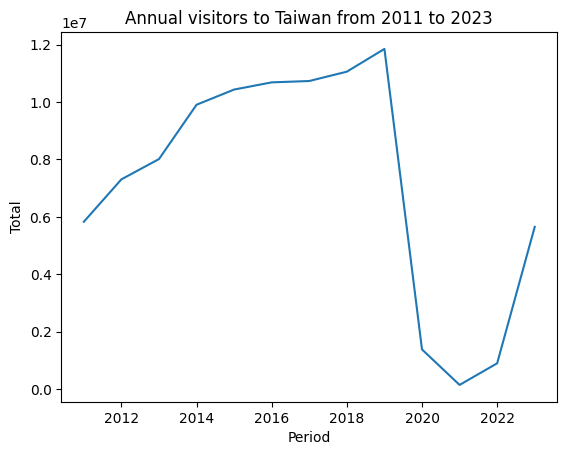

In [15]:
# Make a pivot table grouped by year and sum 'Total' of each month
total_by_year = taiwan_final.pivot_table(values = 'Total', index = taiwan_final.Period.dt.year, aggfunc='sum')

# Plot the data 
_ = sns.lineplot(x=total_by_year.index, y =total_by_year.Total)
plt.title('Annual visitors to Taiwan from 2011 to 2023')
plt.show()

In [16]:
total_by_year

,Total
Period,
2011,5828052
2012,7307025
2013,8013585
2014,9907845
2015,10437517
2016,10687712
2017,10734991
2018,11060801
2019,11853669


It seems that the influx of visitors to Taiwan has exhibited an upward trajectory since 2011, culminating in a record high of 11.85 million. Nevertheless, due to the global pandemic, there was a significant downturn in 2020, with the figure plummeting further to 140 thousand in 2021—less than 2% of the unprecedented peak recorded in 2019.

#### 2. Is there any seasonal fluctuation in the total number of visitors from 2011 to 2023?

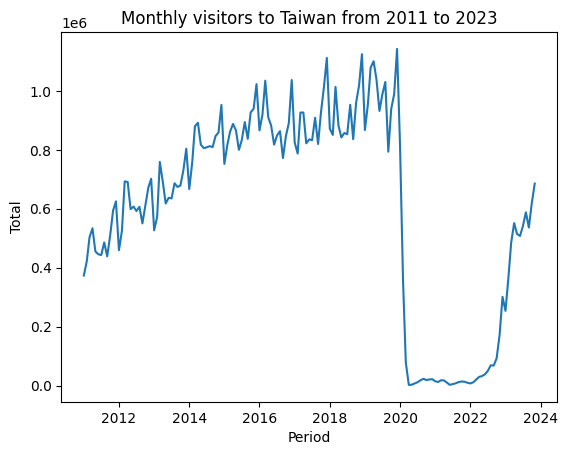

In [17]:
# Make a pivot table grouped by month and sum 'Total' of each country
total_by_month = taiwan_final.pivot_table(values = 'Total', index = taiwan_final.Period, aggfunc='sum')

# Make a line plot 
_ = sns.lineplot(x=total_by_month.index, y =total_by_month.Total)
plt.title('Monthly visitors to Taiwan from 2011 to 2023')
plt.show()

There is definitely a seasonal pattern in the total number of visitors. We can see that the number started to climb up from the beginning of each year, reached the first peak in spring, and declined towards the summer. Afterwards, it rised again and reached the second peak in fall, and decreased towards the end of each year. However, this pattern was only evident before the outburst of pandemic.

#### 3. What were the top 20 countries of residence that visitors to Taiwan came from in the most recent three years before pandemic (2017-2019)?

It will be very interesting to explore which country demonstrated a particular fondness for visiting Taiwan in the three years leading up to the pandemic. We will exclusively focus on the data before 2020, as post-pandemic visitor trends were substantially influenced by travel restrictions imposed by respective countries, which may not accurately capture the essence of this inquiry.

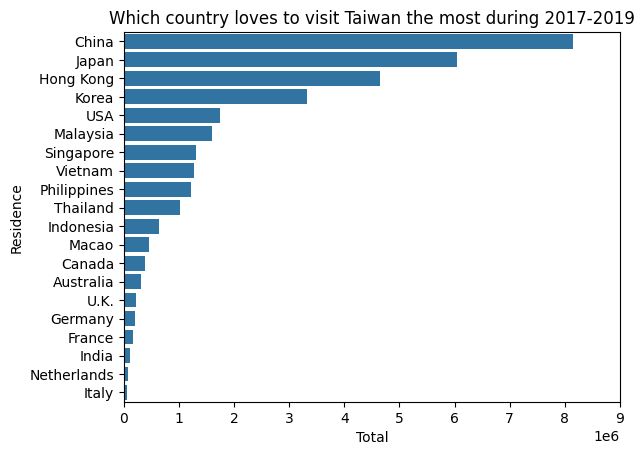

In [18]:
# Select only data from 2017 to 2019
# Make a pivot table grouped by 'Residence', sum 'Total' of each country, and sort from top to bottom
total_by_residence_last3 = taiwan_final[taiwan_final.Period.dt.year.isin([2017, 2018, 2019])].pivot_table(values = 'Total', index = taiwan_final.Residence, aggfunc='sum').sort_values("Total", ascending=False)

# Make a horizontal bar plot
_ = sns.barplot(x=total_by_residence_last3.Total[:20], y =total_by_residence_last3.index[:20])
plt.title('Which country loves to visit Taiwan the most during 2017-2019')
plt.xlim(0, 9000000)
plt.show()

Mainland China loves to visit Taiwan the most during 2017-2019, followed by Japan, Hong Kong, Korea, and USA.

#### 4. What were the top 20 countries of residence that visitors to Taiwan came from during 2011-2013?

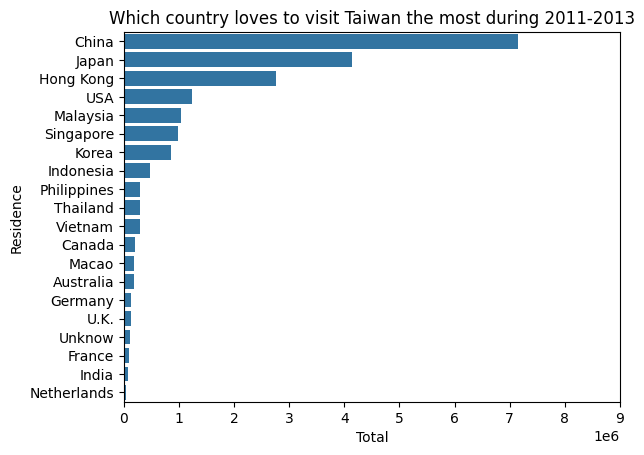

In [19]:
# Select only data from 2011 to 2013
# Make a pivot table grouped by 'Residence', sum 'Total' of each country, and sort from top to bottom
total_by_residence_first3 = taiwan_final[taiwan_final.Period.dt.year.isin([2011, 2012, 2013])].pivot_table(values = 'Total', index = taiwan_final.Residence, aggfunc='sum').sort_values("Total", ascending=False)

# Make a horizontal bar plot
_ = sns.barplot(x=total_by_residence_first3.Total[:20], y =total_by_residence_first3.index[:20])
plt.title('Which country loves to visit Taiwan the most during 2011-2013')
plt.xlim(0, 9000000)
plt.show()

In [20]:
# Compare the total number of visitors during 2017-2019 vs 2011-2013
compare = pd.merge(total_by_residence_first3, total_by_residence_last3, on=['Residence'], suffixes=('_2011-2013','_2017-2019'))
compare['Difference %'] = (compare['Total_2017-2019'] - compare['Total_2011-2013'])/compare['Total_2011-2013']*100
compare.sort_values(by=['Total_2017-2019','Difference %'], ascending=[False, False]).head(10)

,Total_2011-2013,Total_2017-2019,Difference %
Residence,,,
China,7147228,8142229,13.921495
Japan,4143501,6035957,45.672874
Hong Kong,2759255,4645524,68.361532
Korea,850120,3316747,290.150449
USA,1233953,1746491,41.536266
Malaysia,1042047,1591840,52.760864
Singapore,990333,1313434,32.625491
Vietnam,296860,1279499,331.010914
Philippines,300393,1219408,305.937555


Despite the total number of visitors during 2011-2013 is lower than that of the most recent three years, the ranking of the number is mostly similar to 2017-2019. Some countries have more drastic change in the total number now and then, e.g. the number of visitors from Korea, Vietnam and Philippines during 2011-2013 was roughly one fourth of the total visitors recorded between 2017 and 2019.

#### 5. What was the main travel purpose for visitors to Taiwan during 2011-2023?

In [21]:
# Make a pivot table grouped by year and sum the visitor number of all purposes for each year
purpose_by_year = taiwan_final.pivot_table(values = taiwan_final.columns[5:14], index = taiwan_final.Period.dt.year, aggfunc='sum', sort=False)
purpose_by_year

,Business,Leisure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Total
Period,,,,,,,,,
2011,983111,3632187,497375,81671,62479,0,0,571229,5828052
2012,893155,4675996,442775,62891,62580,15724,58441,1095463,7307025
2013,926769,5478378,469220,61515,75819,16249,100081,885554,8013585
2014,769350,7191426,393292,63043,56508,13259,60945,1360022,9907845
2015,758646,7504536,407874,60687,59171,13720,67290,1565593,10437517
2016,732699,7559566,428461,64630,67911,14840,38256,1781349,10687712
2017,744159,7646076,455189,66426,73078,16220,30749,1703094,10734991
2018,737764,7590824,482677,73371,76853,17284,34678,2047350,11060801
2019,744779,8437957,477397,75997,80539,18235,55886,1962879,11853669


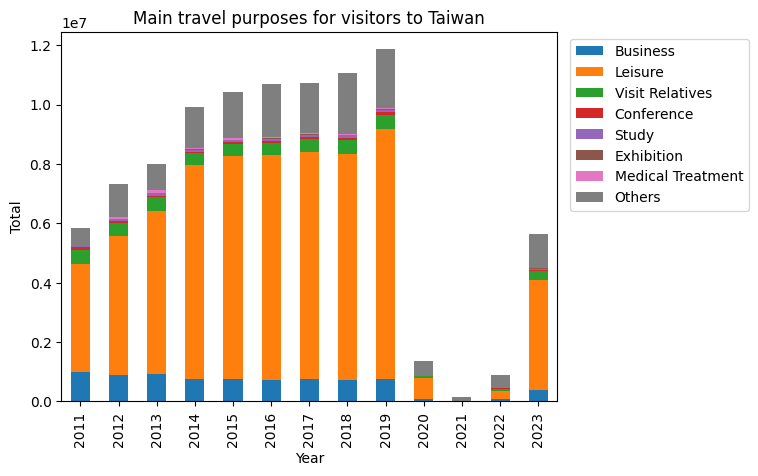

In [22]:
# Make a stacked bar plot with actual visitor numbers
_ = purpose_by_year.drop(columns=['Total']).plot(kind='bar', stacked=True)
plt.title('Main travel purposes for visitors to Taiwan')
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

Majority of visitors to Taiwan were for leisure or recreational purposes.

#### 6. What was the normalized distribution of travel purpose for visitors to Taiwan during 2012-2018?

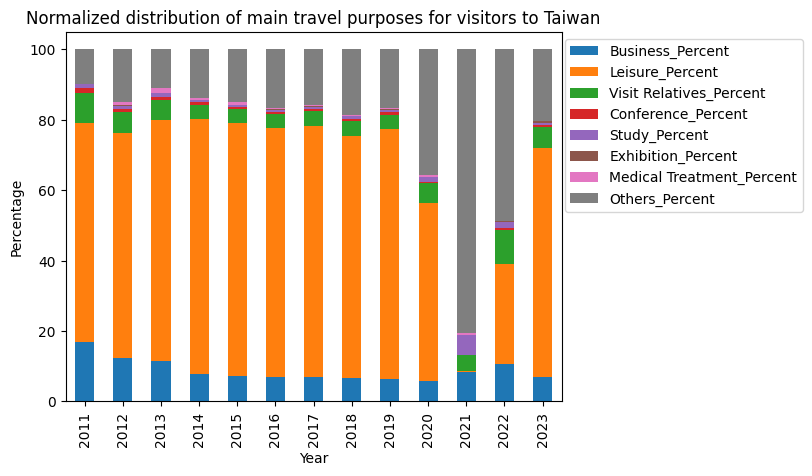

In [23]:
# Create a new pivot table with percentages
purpose_by_year_percent = pd.DataFrame()
for col in purpose_by_year.columns:
    purpose_by_year_percent[col + '_Percent'] = (purpose_by_year[col] / purpose_by_year['Total']) * 100
purpose_by_year_percent

# Make a stacked bar plot with normalized visitor percentages
_ = purpose_by_year_percent.drop('Total_Percent', axis=1).plot(kind='bar', stacked=True)
plt.title('Normalized distribution of main travel purposes for visitors to Taiwan')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

Overall the distribution of travel purposes to Taiwan remained similar throughout the years.

#### 7. Is there any difference in the distribution of purpose between top 10 countries and the others?

In [24]:
# Select only data from 2011 to 2019
# Make a pivot table grouped by 'Residence' and sum the visitor number of all purposes for each country
purpose_by_residence =  taiwan_final[taiwan_final.Period.dt.year.isin(np.arange(2011, 2020))].pivot_table(values = taiwan_final.columns[5:14], index=taiwan_final.Residence, aggfunc='sum', sort=False)
purpose_by_residence

,Business,Leisure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Total
Residence,,,,,,,,,
Japan,2464743,11290416,257212,97160,56032,10196,1239,1160181,15337179
Korea,531606,4873899,140995,53019,48892,21738,565,566991,6237705
DPRK,181,763,28,15,22,11,0,970,1990
Hong Kong,711649,9676704,320157,62940,32347,1684,16534,722853,11544868
China,320036,21442235,616750,33366,161255,7237,388320,4003246,26972445
...,...,...,...,...,...,...,...,...,...
Romania,2819,3249,714,606,160,298,5,5206,13057
Bulgaria,2200,1724,231,211,111,414,8,2872,7771
Moldova,125,40,49,15,6,14,1,201,451


In [25]:
# Add a new column of 'Group' to divide all the countries into two groups
for i in purpose_by_residence.index:
    if i in total_by_residence_last3.index[:10]:
        purpose_by_residence.loc[i, 'Group'] = 'Top10'
    else:
        purpose_by_residence.loc[i, 'Group'] = 'Other'
purpose_by_residence

,Business,Leisure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Total,Group
Residence,,,,,,,,,,
Japan,2464743,11290416,257212,97160,56032,10196,1239,1160181,15337179,Top10
Korea,531606,4873899,140995,53019,48892,21738,565,566991,6237705,Top10
DPRK,181,763,28,15,22,11,0,970,1990,Other
Hong Kong,711649,9676704,320157,62940,32347,1684,16534,722853,11544868,Top10
China,320036,21442235,616750,33366,161255,7237,388320,4003246,26972445,Top10
...,...,...,...,...,...,...,...,...,...,...
Romania,2819,3249,714,606,160,298,5,5206,13057,Other
Bulgaria,2200,1724,231,211,111,414,8,2872,7771,Other
Moldova,125,40,49,15,6,14,1,201,451,Other


In [26]:
# Make a pivot table grouped by 'Group' and sum the visitor number of all purposes for each group
purpose_by_residence_2 = purpose_by_residence.pivot_table(values = taiwan_final.columns[5:14], index = purpose_by_residence.Group, aggfunc='sum', sort=False)
purpose_by_residence_2

,Business,Leisure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Total
Group,,,,,,,,,
Top10,5939761,56645592,3326359,455501,462632,80136,423656,10436068,77769705
Other,1350671,3071354,727901,154730,152306,45395,22670,2536465,8061492


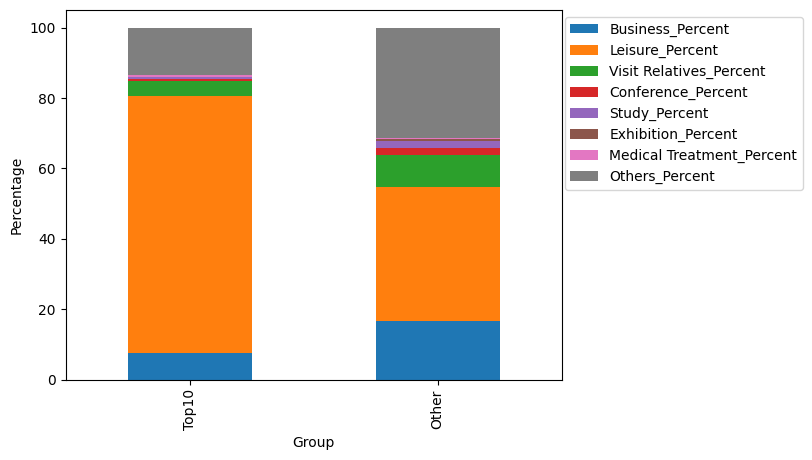

In [27]:
# Create a new pivot table with percentages
purpose_by_residence_percent = pd.DataFrame()
for col in taiwan_final.columns[5:14]:
    purpose_by_residence_percent[col + '_Percent'] = (purpose_by_residence_2[col] / purpose_by_residence_2['Total']) * 100
purpose_by_residence_percent

# Make a stacked bar plot with normalized visitor percentages
_ = purpose_by_residence_percent.drop('Total_Percent', axis=1).plot(kind='bar', stacked=True)
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

There is a significant difference in the distribution of travel purposes to Taiwan between the top 10 countries and the others.

In [28]:
# Save the data to a new csv file for futher analysis
total_by_month.to_csv('../Data/total_by_month.csv') 
